# Problem 4


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd


In [17]:
np.random.seed(42)
n = 50 #sample size
mu_true = 5 #avg sleep time
sigma = 1.5  #standard deviation
data = np.random.normal(mu_true, sigma, n)
ybar = np.mean(data) 
print(f"Sample Mean (ybar): {ybar:.2f} hours")

# Prior parameters (initial belief about sleep time)
mu0 = 5.5
sigma0 = 1.0

# Posterior parameters
sigma_n = np.sqrt(1 / (1 / sigma0**2 + n / sigma**2))
mu_n = (mu0 / sigma0**2 + n * ybar / sigma**2) / (1 / sigma0**2 + n / sigma**2)

print(f"Posterior Mean (µ_n): {mu_n:.2f}")
print(f"Posterior Standard Deviation (σ_n): {sigma_n:.2f}")

Sample Mean (ybar): 4.66 hours
Posterior Mean (µ_n): 4.70
Posterior Standard Deviation (σ_n): 0.21


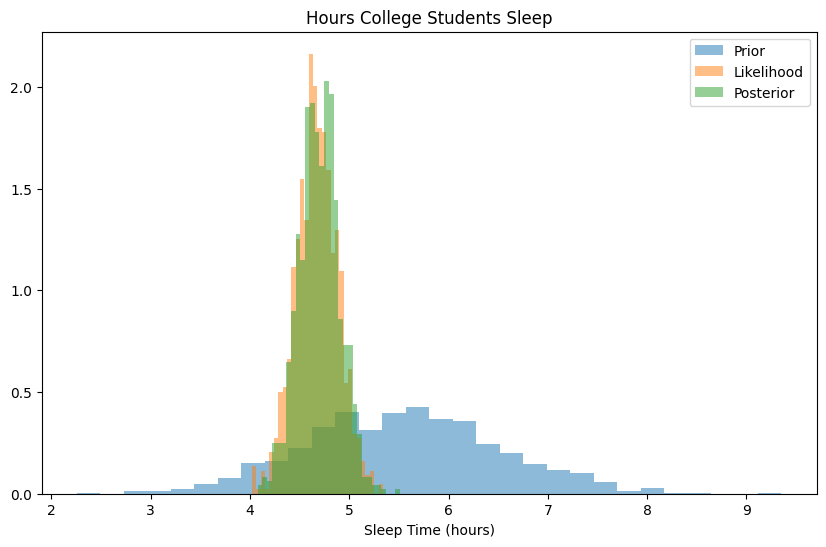

In [18]:
# Define x-axis range
x = np.linspace(3, 8, 1000)

# Generate random samples for histograms
prior_samples = norm.rvs(loc=mu0, scale=sigma0, size=1000)
likelihood_samples = norm.rvs(loc=ybar, scale=sigma / np.sqrt(n), size=1000)
posterior_samples = norm.rvs(loc=mu_n, scale=sigma_n, size=1000)

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(prior_samples, bins=30, density=True, alpha=0.5, label="Prior")
plt.hist(likelihood_samples, bins=30, density=True, alpha=0.5, label="Likelihood")
plt.hist(posterior_samples, bins=30, density=True, alpha=0.5, label="Posterior")
plt.title("Hours College Students Sleep")
plt.xlabel("Sleep Time (hours)")

plt.legend()
plt.show()

In [15]:
# Create a DataFrame
df = pd.DataFrame({
    "": ["Precision", "SD", "Mean"],
    "Prior": [1 / sigma0**2, sigma0, mu0],
    "Data (Sample Mean)": [n / sigma**2, sigma / np.sqrt(n), ybar],
    "Posterior": [1 / sigma_n**2, sigma_n, mu_n]
})

# Display the DataFrame
print(df.round(3))

              Prior  Data (Sample Mean)  Posterior
0  Precision    1.0              44.444     45.444
1         SD    1.0               0.150      0.148
2       Mean    5.5               4.844      4.859
